In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt


energy = 33.5
wavelength = 1.24e-09 / energy
z1 = 5.5*1e-3-1.286*1e-3  # [m] position of the sample
detector_pixelsize = 3.03751e-6
focusToDetectorDistance = 1.28  # [m]
# adjustments for the cone beam
z2 = focusToDetectorDistance - z1
distance = (z1 * z2) / focusToDetectorDistance
magnification = focusToDetectorDistance / z1
voxelsize = float(cp.abs(detector_pixelsize / magnification))
fn = voxelsize**2/distance/wavelength
print(fn)

0.0006432285080441444


In [13]:
import math

def fresnel_zone_radius(n, wavelength, L):
    """
    Calculate the radius of the n-th Fresnel zone.
    
    Parameters:
        n (int): Zone number.
        wavelength (float): Wavelength of light in meters.
        L (float): Distance from aperture to observation point in meters.
    
    Returns:
        float: Radius of the n-th Fresnel zone in meters.
    """
    r_n = math.sqrt(n * wavelength * L)
    return r_n*1e6

# Example usage:
n = 20  # First Fresnel zone

radius = fresnel_zone_radius(n, wavelength, distance)
print(f"Radius of the {n}-th Fresnel zone: {radius} meters")
print(150*10e-9)

Radius of the 20-th Fresnel zone: 1.7633342120421214 meters
1.5e-06


0.39429351651772115
0.5576152386151413
0.6829364037036914
0.7885870330354423
0.8816671060210607
0.9658179243560676
1.0432025882710285
1.1152304772302826
1.1828805495531636
1.2468655788332217
1.3077236515590804
1.3658728074073827
1.421645491387651
1.4753112486356044


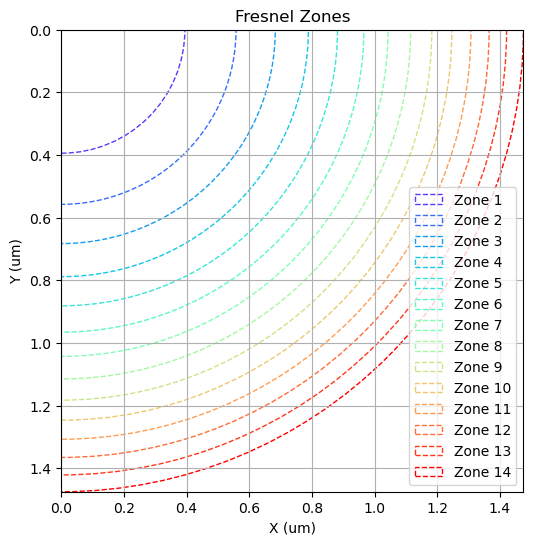

In [14]:

num_zones=14
fig, ax = plt.subplots(figsize=(6, 6))
# Plot Fresnel zones as circles
for n in range(1, num_zones + 1):
    radius = fresnel_zone_radius(n, wavelength, distance)
    print(radius)
    circle = plt.Circle((0, 0), radius, color=plt.cm.rainbow(n / num_zones), fill=False, linestyle='--', label=f'Zone {n}')
    ax.add_artist(circle)


# # Set axis limits to give some space around the circles
ax.set_xlim(-0,
            np.max([fresnel_zone_radius(num_zones, wavelength, distance)]))
ax.set_ylim(0,
            np.max([fresnel_zone_radius(num_zones, wavelength, distance)]))

# Set aspect ratio to equal for circles to appear as circles
ax.set_aspect('equal', 'box')
ax.invert_yaxis()
# Add title and labels
plt.title('Fresnel Zones')
plt.xlabel('X (um)')
plt.ylabel('Y (um)')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Text(0, 0.5, 'Y [m]')

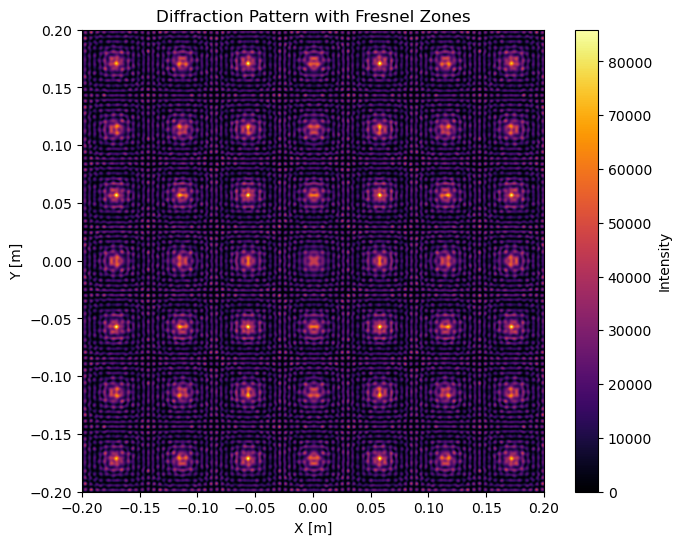

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 500e-9  # Wavelength in meters (e.g., 500 nm)
distance = 1.0  # Distance to the screen (in meters)
radius_aperture = 0.05  # Radius of the circular aperture (in meters)
num_points = 500  # Number of points in the grid

# Create the grid for the diffraction pattern (screen)
x = np.linspace(-0.2, 0.2, num_points)
y = np.linspace(-0.2, 0.2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the radial distance from the center of the screen
r = np.sqrt(X**2 + Y**2)

# Function to calculate Fresnel zones
def fresnel_zones(radius, distance, wavelength):
    # Fresnel zone radii for m = 1, 2, 3...
    m = np.arange(1, 6)  # First 5 zones
    zone_radii = np.sqrt(m * wavelength * distance)
    return zone_radii

# Define the aperture function (circular aperture)
aperture = np.where(r <= radius_aperture, 1, 0)

# Function for calculating diffraction pattern using the Fraunhofer approximation (far field)
def fraunhofer_diffraction(X, Y, aperture, wavelength, distance):
    # Distance to screen (far-field approximation)
    k = 2 * np.pi / wavelength  # Wave number
    R = np.sqrt(X**2 + Y**2 + distance**2)  # Total distance from source to screen
    # Fraunhofer diffraction pattern
    diffraction = np.fft.fftshift(np.fft.fft2(aperture * np.exp(1j * k * R)))
    intensity = np.abs(diffraction)**2
    return intensity

# Compute the diffraction pattern (far-field)
intensity = fraunhofer_diffraction(X, Y, aperture, wavelength, distance)

# Plot diffraction pattern
plt.figure(figsize=(8, 6))
plt.imshow(intensity, extent=[x[0], x[-1], y[0], y[-1]], cmap='inferno')
plt.colorbar(label="Intensity")
plt.title("Diffraction Pattern with Fresnel Zones")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")